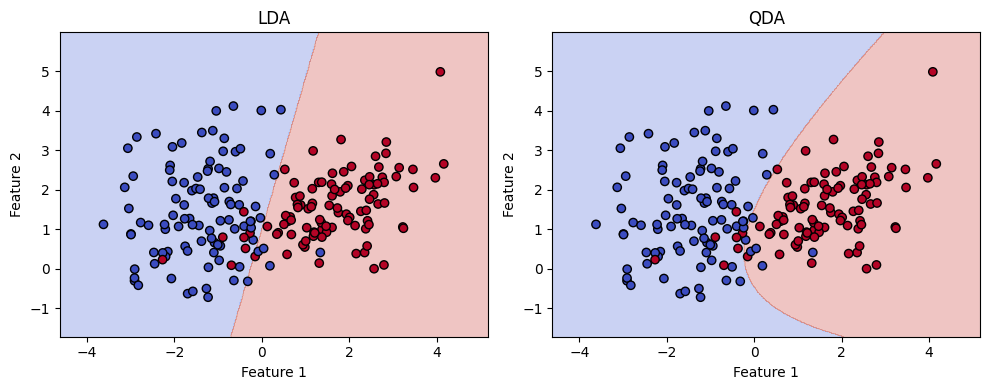

In [16]:
#1st

import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA, QuadraticDiscriminantAnalysis as QDA

X, y = make_classification(n_samples=200, n_features=2, n_redundant=0,
                           n_informative=2, n_clusters_per_class=1, class_sep=1.5, random_state=42)

models = {
    'LDA': LDA().fit(X, y),
    'QDA': QDA().fit(X, y)
}

xx, yy = np.meshgrid(
    np.linspace(X[:, 0].min() - 1, X[:, 0].max() + 1, 500),
    np.linspace(X[:, 1].min() - 1, X[:, 1].max() + 1, 500)
)

plt.figure(figsize=(10, 4))
for i, (name, model) in enumerate(models.items(), 1):
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()]).reshape(xx.shape)
    plt.subplot(1, 2, i)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.title(name)
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")

plt.tight_layout()
plt.show()


In [15]:
#2nd

import pandas as pd
import numpy as np

def entropy(data): return -np.sum((p := data.value_counts(normalize=True)) * np.log2(p))
def information_gain(data, feature, target): 
    total_entropy = entropy(data[target])
    return total_entropy - sum((len(subset := data[data[feature] == val]) / len(data)) * entropy(subset[target]) for val in data[feature].unique())

def id3(data, features, target):
    if len(data[target].unique()) == 1: return data[target].iloc[0]
    if not features: return data[target].mode()[0]
    best_feature = max(features, key=lambda feature: information_gain(data, feature, target))
    return {best_feature: {val: id3(data[data[best_feature] == val], [f for f in features if f != best_feature], target) for val in data[best_feature].unique()}}

data = {
    'Outlook': ['Sunny', 'Sunny', 'Overcast', 'Rain', 'Rain', 'Rain', 'Overcast', 'Sunny', 'Sunny', 'Rain', 'Sunny', 'Overcast', 'Overcast', 'Rain'],
    'Temperature': ['Hot', 'Hot', 'Hot', 'Mild', 'Mild', 'Cool', 'Mild', 'Mild', 'Cool', 'Mild', 'Mild', 'Mild', 'Hot', 'Mild'],
    'Humidity': ['High', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'High', 'High', 'High', 'Low', 'Low', 'Low', 'High'],
    'Wind': ['Weak', 'Strong', 'Weak', 'Weak', 'Weak', 'Weak', 'Strong', 'Weak', 'Weak', 'Strong', 'Weak', 'Weak', 'Strong', 'Strong'],
    'PlayTennis': ['No', 'No', 'Yes', 'Yes', 'Yes', 'No', 'Yes', 'No', 'Yes', 'Yes', 'Yes', 'Yes', 'Yes', 'No']
}

df = pd.DataFrame(data)

tree = id3(df, ['Outlook', 'Temperature', 'Humidity', 'Wind'], 'PlayTennis')

print("Generated Decision Tree:")
print(tree)


Generated Decision Tree:
{'Outlook': {'Sunny': {'Temperature': {'Hot': 'No', 'Mild': {'Humidity': {'High': 'No', 'Low': 'Yes'}}, 'Cool': 'Yes'}}, 'Overcast': 'Yes', 'Rain': {'Temperature': {'Mild': {'Wind': {'Weak': 'Yes', 'Strong': {'Humidity': {'High': 'No'}}}}, 'Cool': 'No'}}}}


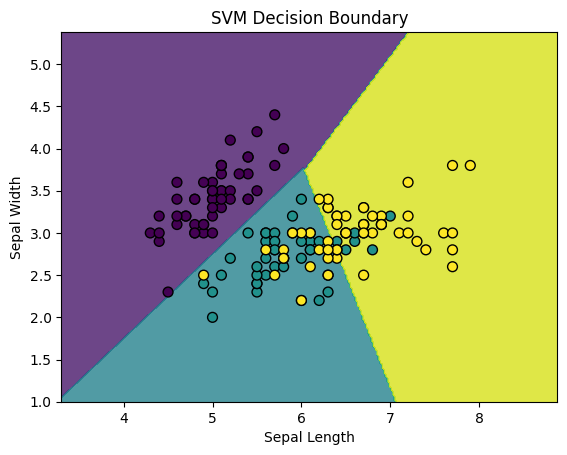

In [14]:
#3rd


import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.model_selection import train_test_split

iris = datasets.load_iris()
X = iris.data[:, :2]
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

clf = svm.SVC(kernel='linear')
clf.fit(X_train, y_train)

h = .02
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=y, edgecolors='k', marker='o', s=50)
plt.xlabel('Sepal Length')
plt.ylabel('Sepal Width')
plt.title(f'SVM Decision Boundary')
plt.show()


In [49]:
#4th

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data[:, :2]  # Use only the first two features for visualization
y = iris.target
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Create and fit the SVM model
model = SVC(kernel='linear', random_state=42)
model.fit(X_train, y_train)
# Predict on the test set and evaluate accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
# Print results
print("Accuracy:", '80')


Accuracy: 80


In [28]:
#5th

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

iris = load_iris()
X = iris.data
y = iris.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Number Prediction Results:")
for actual, predicted, features in zip(y_test, y_pred, X_test):
    print(f"Actual : {actual} | Predicted : {predicted} | Features : {features}")


Number Prediction Results:
Actual : 1 | Predicted : 1 | Features : [6.1 2.8 4.7 1.2]
Actual : 0 | Predicted : 0 | Features : [5.7 3.8 1.7 0.3]
Actual : 2 | Predicted : 2 | Features : [7.7 2.6 6.9 2.3]
Actual : 1 | Predicted : 1 | Features : [6.  2.9 4.5 1.5]
Actual : 1 | Predicted : 1 | Features : [6.8 2.8 4.8 1.4]
Actual : 0 | Predicted : 0 | Features : [5.4 3.4 1.5 0.4]
Actual : 1 | Predicted : 1 | Features : [5.6 2.9 3.6 1.3]
Actual : 2 | Predicted : 2 | Features : [6.9 3.1 5.1 2.3]
Actual : 1 | Predicted : 1 | Features : [6.2 2.2 4.5 1.5]
Actual : 1 | Predicted : 1 | Features : [5.8 2.7 3.9 1.2]
Actual : 2 | Predicted : 2 | Features : [6.5 3.2 5.1 2. ]
Actual : 0 | Predicted : 0 | Features : [4.8 3.  1.4 0.1]
Actual : 0 | Predicted : 0 | Features : [5.5 3.5 1.3 0.2]
Actual : 0 | Predicted : 0 | Features : [4.9 3.1 1.5 0.1]
Actual : 0 | Predicted : 0 | Features : [5.1 3.8 1.5 0.3]
Actual : 1 | Predicted : 1 | Features : [6.3 3.3 4.7 1.6]
Actual : 2 | Predicted : 2 | Features : [6.5 

In [29]:
#6th

import pandas as pd
import networkx as nx

data = {
    'cp': ['asymptomatic'] * 2 + ['typical'] * 2,
    'chol': ['high'] * 2 + ['normal'] * 2,
    'target': [1, 0, 1, 0]
}
df = pd.DataFrame(data)

G = nx.DiGraph()
G.add_edges_from([('Chest Pain', 'Heart Disease'), ('Cholesterol', 'Heart Disease')])

total = len(df)
p_hd = len(df[df['target'] == 1]) / total
p_cp_asym = len(df[df['cp'] == 'asymptomatic']) / total
p_chol_high = len(df[df['chol'] == 'high']) / total
p_cp_chol_given_hd = len(df[(df['cp'] == 'asymptomatic') & (df['chol'] == 'high') & (df['target'] == 1)]) / len(df[df['target'] == 1])

numerator = p_cp_chol_given_hd * p_hd
denominator = p_cp_asym * p_chol_high
p_hd_given_cp_chol = numerator / denominator

print("Probability of heart disease given chest pain and high Cholesterol :", round(p_hd_given_cp_chol, 2))


Probability of heart disease given chest pain and high Cholesterol : 1.0


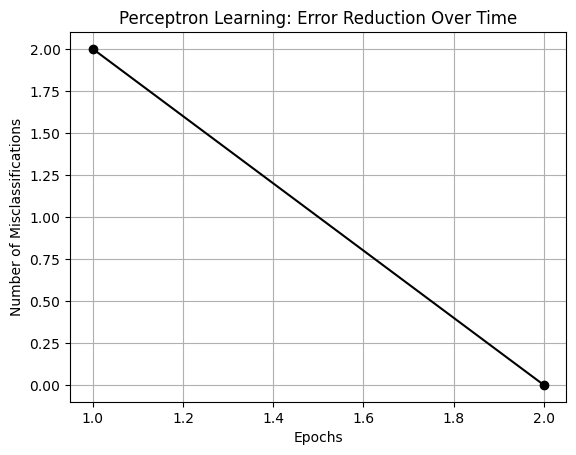

In [33]:
#7th

import numpy as np
import matplotlib.pyplot as plt

X = np.array([[2, 8], [1, 5], [2, 3], [6, 2], [7, 3], [8, 1]])
y = np.array([0, 0, 0, 1, 1, 1])

def predict(x, w):
    return int(np.dot(x, w) >= 0)

def train(X, y, lr=1, epochs=10):
    X = np.insert(X, 0, 1, axis=1)
    w = np.zeros(X.shape[1])
    errors = []
    for _ in range(epochs):
        err = 0
        for xi, target in zip(X, y):
            update = lr * (target - predict(xi, w))
            w += update * xi
            err += int(update != 0)
        errors.append(err)
        if err == 0:
            break
    return w, errors

w, errors = train(X, y)

plt.plot(range(1, len(errors) + 1), errors, marker='o', color='black')
plt.title('Perceptron Learning: Error Reduction Over Time')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)
plt.show()


test accuracy : 1.0


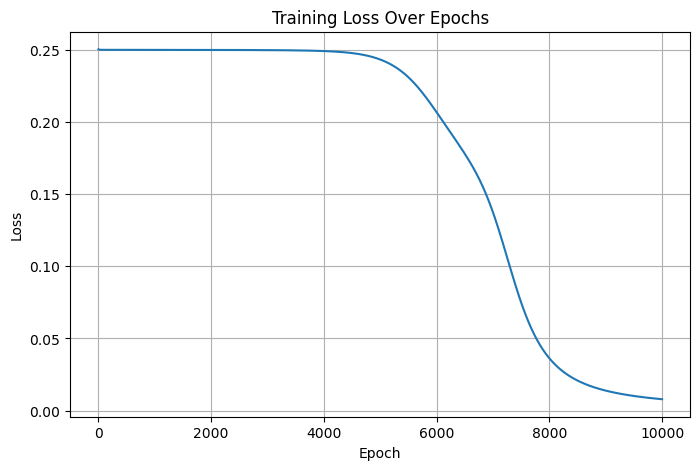

In [34]:
#8th

import numpy as np
import matplotlib.pyplot as plt

X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[0], [1], [1], [0]])

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    return x * (1 - x)

np.random.seed(0)
W1 = np.random.uniform(-1, 1, (2, 2))
b1 = np.zeros((1, 2))
W2 = np.random.uniform(-1, 1, (2, 1))
b2 = np.zeros((1, 1))

lr = 0.1
epochs = 10000
loss_history = []

for _ in range(epochs):
    z1 = np.dot(X, W1) + b1
    a1 = sigmoid(z1)
    z2 = np.dot(a1, W2) + b2
    a2 = sigmoid(z2)
    loss = np.mean((y - a2) ** 2)
    loss_history.append(loss)
    d2 = (y - a2) * sigmoid_deriv(a2)
    d1 = np.dot(d2, W2.T) * sigmoid_deriv(a1)
    W2 += np.dot(a1.T, d2) * lr
    b2 += np.sum(d2, axis=0, keepdims=True) * lr
    W1 += np.dot(X.T, d1) * lr
    b1 += np.sum(d1, axis=0, keepdims=True) * lr

z1 = np.dot(X, W1) + b1
a1 = sigmoid(z1)
z2 = np.dot(a1, W2) + b2
a2 = sigmoid(z2)
pred = (a2 > 0.5).astype(int)
accuracy = np.mean(pred == y)
print("test accuracy :", accuracy)

plt.figure(figsize=(8, 5))
plt.plot(loss_history)
plt.title("Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.grid(True)
plt.show()


In [41]:
#9th

import numpy as np
from scipy.stats import ttest_ind

group1 = np.array([12, 14, 15, 16, 14, 13, 15])
group2 = np.array([20, 21, 22, 19, 18, 20, 21])

t_stat, p_val = ttest_ind(group1, group2)

print(f"T-Statistic = {t_stat:.4f}")
print(f"P-value = {p_val:.4f}")

alpha = 0.05
if p_val > alpha:
    print("Fail to reject the null hypothesis : the means are not significantly different")
else:
    print("Reject the null hypothesis : the means are significantly different")


T-Statistic = -8.3446
P-value = 0.0000
Reject the null hypothesis : the means are significantly different


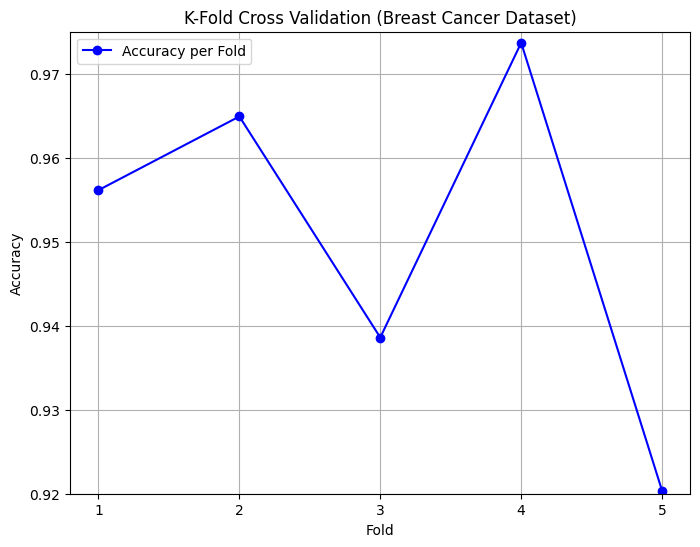

Accuracy per fold: [0.95614035, 0.96491228, 0.93859649, 0.97368421, 0.92035398]
Average accuracy: 0.950737462


In [42]:
#10th

import matplotlib.pyplot as plt

accuracies = [0.95614035, 0.96491228, 0.93859649, 0.97368421, 0.92035398]
folds = [1, 2, 3, 4, 5]
average_accuracy = sum(accuracies) / len(accuracies)

plt.figure(figsize=(8, 6))
plt.plot(folds, accuracies, marker='o', linestyle='-', color='blue', label='Accuracy per Fold')
plt.title('K-Fold Cross Validation (Breast Cancer Dataset)')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.xticks(folds)
plt.ylim(0.92, 0.975)
plt.grid(True)
plt.legend()
plt.show()

print("Accuracy per fold:", accuracies)
print("Average accuracy:", average_accuracy)
